In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-06-06 11:26:37.543380: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10195  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10197  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10198  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10199  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.209999   
1      4.113529  4.223896  63.821798  62.581992  ...           112.209999   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.699997   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.699997   
4      4.405489  4.587935  60.655199  58.351445  ...            56.239998   
...         ...       ...        ...        ...  ...                  ...   
10195  4.346215  4.374028  86.797202  86.444072  ...           -13.349999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
10197  4.237512  4.264786  90.106352  89.978233  ...           105.129997   
10198  3.745458  3.792684  82.634552  82.112733  ...          -145.229996   
10199  3.823687  3.867705  84.046602  83.596072  ...          -147.250000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.379997           22.689999            62.099998   
1               67.379997           22.689999            62.099998   
2              -98.750000          -52.799999            57.230000   
3              -98.750000          -52.799999            57.230000   
4              101.639999          146.940002            36.759998   
...                   ...                 ...                  ...   
10195          -57.930000         -102.669998            58.980000   
10196           60.469997           15.740000            52.669998   
10197           60.469997           15.740000            52.669998   
10198          -99.439995          -53.639999            52.279999   
10199         -101.619995          -55.939999            47.379997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.959999           61.959999    20180403T030600Z   
1               50.959999           61.959999    20180403T030600Z   
2               45.759998           57.119999    20180404T042700Z   
3               45.759998           57.119999    20180404T042700Z   
4               27.439999           36.730000    20180404T175400Z   
...                   ...                 ...                 ...   
10195           47.930000           59.090000    20200121T132400Z   
10196           41.669998           52.629997    20200121T200600Z   
10197           41.669998           52.629997    20200121T200600Z   
10198           41.049999           52.180000    20200121T214800Z   
10199           36.430000           47.020000    20200121T221800Z   

             stop_sensing_time        u10        v10  
0      20180403T044758.125000Z   1.125562  -5.806792  
1      20180403T044758.125000Z   0.063789  -5.914661  
2      20180404T060858.125000Z  -0.424115   1.525726  
3      20180404T060858.125000Z   0.056819   2.623381  
4      20180404T193258.125000Z  -0.504271   6.171964  
...                        ...        ...        ...  
10195  20200121T150558.125000Z   1.487218  11.194811  
10196  20200121T2

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0     -0.265854 -0.405009  258.355000  2477.429236  1020.302350  1021.538998   
1     -0.239654 -0.298918  258.629996  2477.731768  1020.379711  1021.616504   
2     -0.060309 -0.164963  337.485001  2477.745677  1016.227102  1017.455994   
3     -0.196889 -0.216751  338.524998  2477.762501  1015.713488  1016.941504   
4      0.004358 -0.221627  340.649998  2477.589490  1016.508053  1017.731516   
...         ...       ...         ...          ...          ...          ...   
10195  0.078067 -0.018678  286.894995  2491.681647   996.236889   997.464505   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
10197  0.078067 -0.018678  281.330002  2491.649510   994.284652   995.514005   
10198  0.078067 -0.018678  236.134998  2491.793851   994.133050   995.364493   
10199  0.078067 -0.018678  297.035001  2491.789550   994.671646   995.903503   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
0      4.277434  4.374553  66.150299  65.122498  ...           112.209999   
1      4.113529  4.223896  63.821798  62.581992  ...           112.209999   
2      4.466434  4.565075  65.958899  64.877946  ...          -144.699997   
3      4.709281  4.788328  69.045948  68.241269  ...          -144.699997   
4      4.405489  4.587935  60.655199  58.351445  ...            56.239998   
...         ...       ...        ...        ...  ...                  ...   
10195  4.346215  4.374028  86.797202  86.444072  ...           -13.349999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
10197  4.237512  4.264786  90.106352  89.978233  ...           105.129997   
10198  3.745458  3.792684  82.634552  82.112733  ...          -145.229996   
10199  3.823687  3.867705  84.046602  83.596072  ...          -147.250000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
0               67.379997           22.689999            62.099998   
1               67.379997           22.689999            62.099998   
2              -98.750000          -52.799999            57.230000   
3              -98.750000          -52.799999            57.230000   
4              101.639999          146.940002            36.759998   
...                   ...                 ...                  ...   
10195          -57.930000         -102.669998            58.980000   
10196           60.469997           15.740000            52.669998   
10197           60.469997           15.740000            52.669998   
10198          -99.439995          -53.639999            52.279999   
10199         -101.619995          -55.939999            47.379997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
0               50.959999           61.959999    20180403T030600Z   
1               50.959999           61.959999    20180403T030600Z   
2               45.759998           57.119999    20180404T042700Z   
3               45.759998           57.119999    20180404T042700Z   
4               27.439999           36.730000    20180404T175400Z   
...                   ...                 ...                 ...   
10195           47.930000           59.090000    20200121T132400Z   
10196           41.669998           52.629997    20200121T200600Z   
10197           41.669998           52.629997    20200121T200600Z   
10198           41.049999           52.180000    20200121T214800Z   
10199           36.430000           47.020000    20200121T221800Z   

             stop_sensing_time        u10        v10  
0      20180403T044758.125000Z   1.125562  -5.806792  
1      20180403T044758.125000Z   0.063789  -5.914661  
2      20180404T060858.125000Z  -0.424115   1.525726  
3      20180404T060858.125000Z   0.056819   2.623381  
4      20180404T193258.125000Z  -0.504271   6.171964  
...                        ...        ...        ...  
10195  20200121T150558.125000Z   1.487218  11.194811  
10196  20200121T2

In [7]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
8291  -0.012150 -0.032903  266.100000  2491.995719  1031.113303  1032.385986   
3812   0.009946 -0.040725  325.699998  2486.762542  1002.355768  1003.579007   
2220  -0.098607 -0.048255  292.959996  2465.628629  1012.968245  1014.174503   
4495   0.547509  0.022966  337.584998  2482.259844   993.137445   994.339005   
1173   0.085739  0.094400  357.980002  2471.653475  1017.458491  1018.669986   
...         ...       ...         ...          ...          ...          ...   
7832  -0.012150 -0.032903  272.535001  2491.064483  1016.776770  1018.032996   
9509   0.065996 -0.026629  273.849998  2476.814342  1011.035600  1012.250504   
2283   0.016743 -0.032014  288.435002  2467.407841  1014.254360  1015.478500   
10196  0.078067 -0.018678  303.655000  2491.649560   994.401416   995.630505   
8799  -0.012150 -0.032903  331.705000  2484.796885  1011.504464  1012.736490   

            Q10      Qair         RH       RH10  ...  azi_angle_trip_fore  \
8291   4.375262  4.390499  93.076403  93.066660  ...            53.500000   
3812   5.421004  5.432089  90.952000  90.829780  ...           105.349998   
2220   5.485714  5.685436  62.488897  60.825029  ...            56.160000   
4495   6.040936  6.061799  86.591240  86.278805  ...            73.409996   
1173   8.439131  8.454612  95.247900  95.275105  ...            54.480000   
...         ...       ...        ...        ...  ...                  ...   
7832   3.411718  3.462474  73.038053  72.278851  ...            49.070000   
9509   6.481914  6.540536  83.244302  82.543787  ...            55.559998   
2283   3.801912  4.031039  56.148297  53.812369  ...           -24.299999   
10196  4.236066  4.264247  89.521652  89.357990  ...           105.129997   
8799   4.436205  4.520474  72.850603  71.568573  ...           -12.940000   

       azi_angle_trip_mid  azi_angle_trip_aft  inc_angle_trip_fore  \
8291            99.329994          145.099991            52.219997   
3812            60.669998           15.929999            51.360001   
2220           101.400002          146.589996            37.619999   
4495           117.959999          162.399994            59.059998   
1173           100.189995          145.770004            48.719997   
...                   ...                 ...                  ...   
7832            95.549995          141.940002            63.939999   
9509           101.309998          146.940002            46.489998   
2283           -69.070000         -113.919998            61.529999   
10196           60.469997           15.740000            52.669998   
8799           -57.509998         -102.110001            58.449997   

       inc_angle_trip_mid  inc_angle_trip_aft  start_sensing_time  \
8291            41.040001           52.239998    20210402T110300Z   
3812            40.430000           51.329998    20170612T204500Z   
2220            28.219999           37.610001    20171118T141200Z   
4495            47.939999           58.859997    20160129T130900Z   
1173            37.790001           48.719997    20160916T174500Z   
...                   ...                 ...                 ...   
7832            52.369999           63.719997    20210118T120300Z   
9509            35.770000           46.469997    20190816T122700Z   
2283            50.469997           61.609997    20171207T151500Z   
10196           41.669998           52.629997    20200121T200600Z   
8799            47.399998           58.489998    20210618T140600Z   

             stop_sensing_time       u10        v10  
8291   20210402T124458.125000Z  6.045154   7.037160  
3812   20170612T222658.125000Z -6.122303  -9.317768  
2220   20171118T155058.125000Z  5.725120   4.448625  
4495   20160129T144758.125000Z  5.358885 -13.263199  
1173   20160916T192358.125000Z  1.669808  -3.258454  
...                        ...       ...        ...  
7832   20210118T134158.125000Z  6.045154   7.037160  
9509   20190816T140858.12

In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

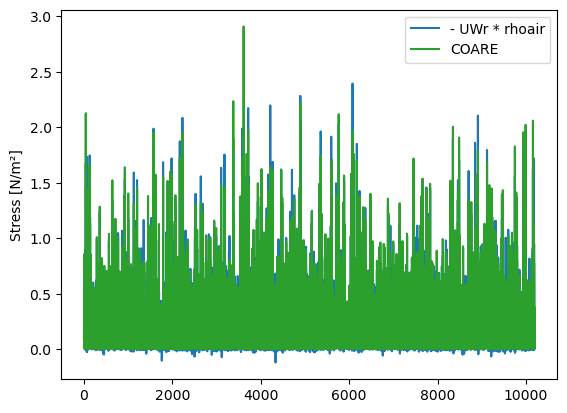

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

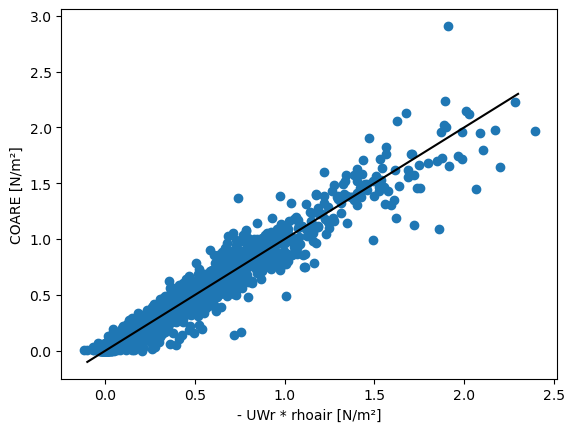

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(10200, 67)

In [13]:
df.shape[0]*0.8

8160.0

In [14]:
split_idx = 8160

# Prepare features and labels

In [15]:
predictor_variables = [
    #'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    #'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    #'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

u10        v10
8291   6.045154   7.037160
3812  -6.122303  -9.317768
2220   5.725120   4.448625
4495   5.358885 -13.263199
1173   1.669808  -3.258454
...         ...        ...
7832   6.045154   7.037160
9509   4.793102  -5.152116
2283   9.488249  -0.378240
10196  4.111861   8.730479
8799   6.045154   7.037160

[10200 rows x 2 columns]

In [17]:
y = - df['UWr'] * df['rhoair']
y

8291     0.142940
3812     0.248008
2220     0.128759
4495     0.448188
1173     0.011088
           ...   
7832     0.026857
9509     0.048700
2283     0.157549
10196    0.061098
8799     0.006362
Length: 10200, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

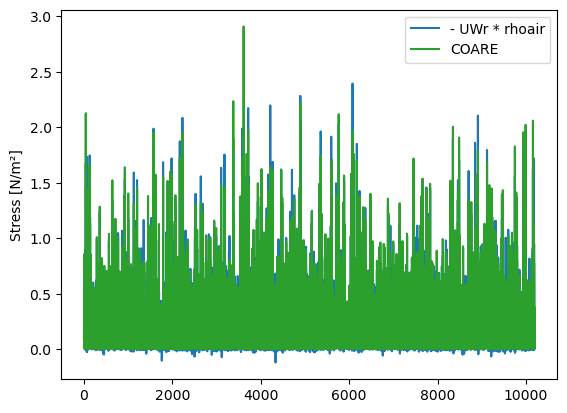

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-06-06 11:27:49.660029: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-06 11:27:49.661206: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-06 11:27:49.661218: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-06 11:27:49.661238: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-gm5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-06 11:27:49.661790: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
179/179 [==============================] - 1s 5ms/step - loss: 2.1440 - mean_absolute_error: 1.0267 - val_loss: 1.5151 - val_mean_absolute_error: 0.8690
Epoch 2/500
179/179 [==============================] - 0s 604us/step - loss: 1.6200 - mean_absolute_error: 0.8803 - val_loss: 1.2380 - val_mean_absolute_error: 0.7725
Epoch 3/500
179/179 [==============================] - 0s 624us/step - loss: 1.4675 - mean_absolute_error: 0.7962 - val_loss: 1.0578 - val_mean_absolute_error: 0.7050
Epoch 4/500
179/179 [==============================] - 0s 623us/step - loss: 1.1576 - mean_absolute_error: 0.7095 - val_loss: 0.9385 - val_mean_absolute_error: 0.6581
Epoch 5/500
179/179 [==============================] - 0s 589us/step - loss: 1.0826 - mean_absolute_error: 0.6766 - val_loss: 0.8586 - val_mean_absolute_error: 0.6255
Epoch 6/500
179/179 [==============================] - 0s 568us/step - loss: 1.0047 - mean_absolute_error: 0.6499 - val_loss: 0.8061 - val_mean_absolute_error: 0.6023


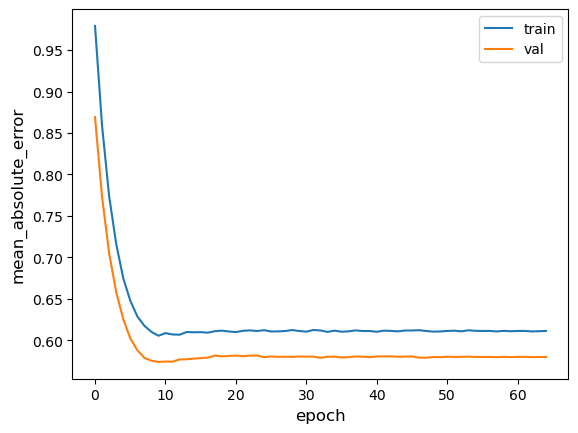

64/64 [==============================] - 0s 336us/step - loss: 0.9156 - mean_absolute_error: 0.6275
Test accuracy 0.6274933218955994
Test loss 0.9155914783477783


In [27]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [28]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [29]:
np.mean(y_test)

0.17533387401213504

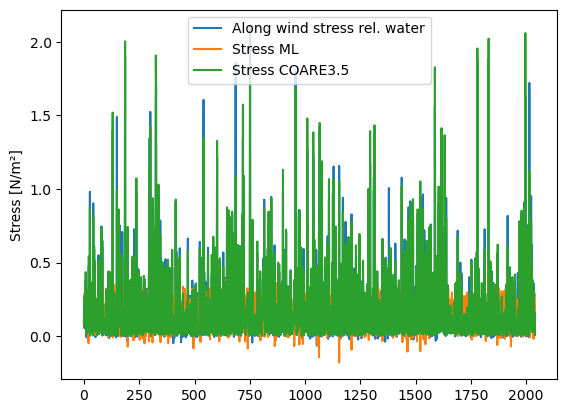

In [30]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

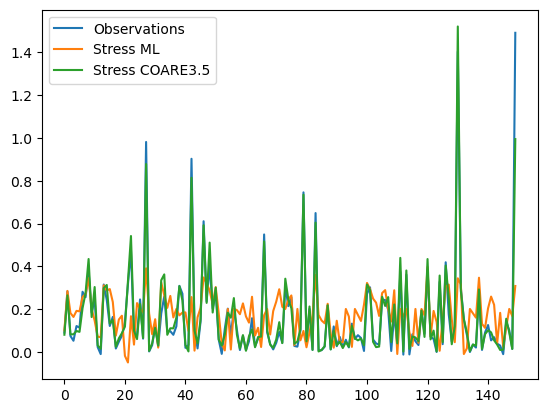

In [31]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

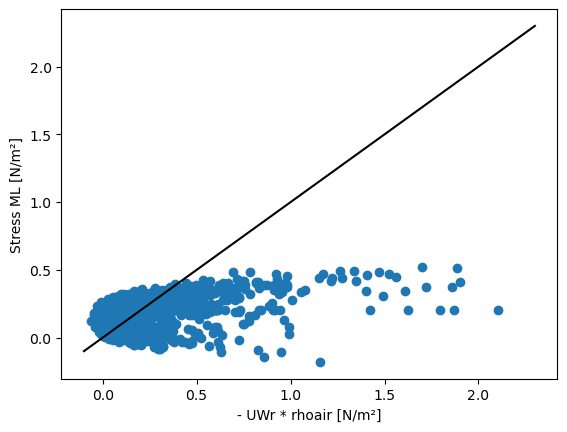

In [32]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

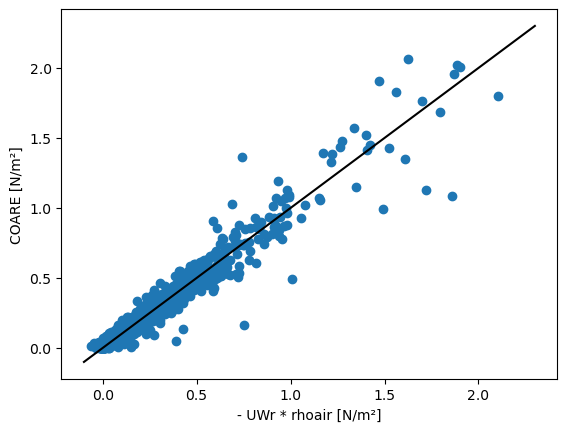

In [33]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [34]:
rmse(y_test.values, y_test_pred)

0.2642111025352496

In [35]:
rmse(y_test.values, c_test)

0.056241578532168816

## Correlation

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.41241964],
       [0.41241964, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

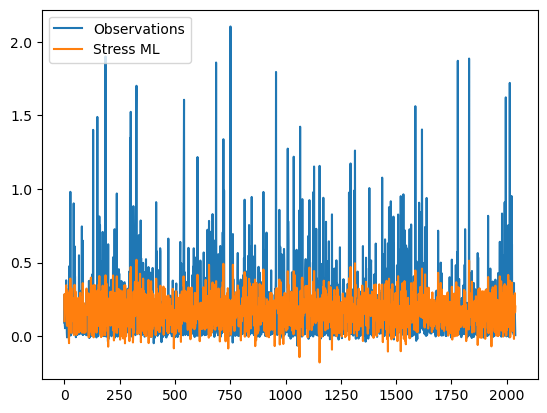

In [38]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [39]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.41241964],
       [0.41241964, 1.        ]])

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [41]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.2642111025352496

# Other experiments

In [42]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [43]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [44]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.4),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 1.5978 - mean_absolute_error: 0.8948 - val_loss: 0.6621 - val_mean_absolute_error: 0.5169
Epoch 2/500
179/179 [==============================] - 0s 754us/step - loss: 0.8773 - mean_absolute_error: 0.5559 - val_loss: 0.4790 - val_mean_absolute_error: 0.3931
Epoch 3/500
179/179 [==============================] - 0s 746us/step - loss: 0.6823 - mean_absolute_error: 0.4668 - val_loss: 0.4095 - val_mean_absolute_error: 0.3685
Epoch 4/500
179/179 [==============================] - 0s 717us/step - loss: 0.5712 - mean_absolute_error: 0.4402 - val_loss: 0.3911 - val_mean_absolute_error: 0.3677
Epoch 5/500
179/179 [==============================] - 0s 704us/step - loss: 0.5430 - mean_absolute_error: 0.4278 - val_loss: 0.3844 - val_mean_absolute_error: 0.3668
Epoch 6/500
179/179 [==============================] - 0s 724us/step - loss: 0.5554 - mean_absolute_error: 0.4237 - val_loss: 0.3830 - val_mean_absolute_error: 0.3687


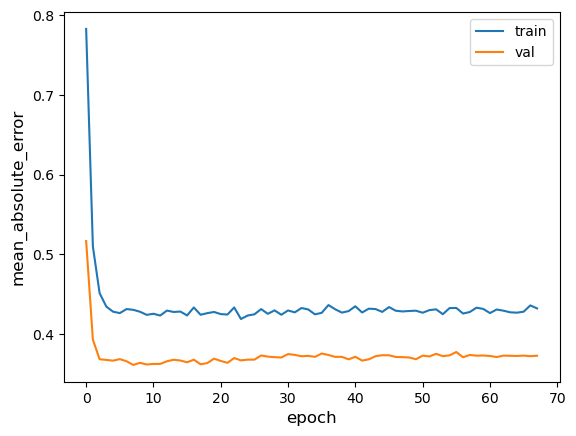

64/64 [==============================] - 0s 342us/step - loss: 0.4516 - mean_absolute_error: 0.3986
Test accuracy 0.39861711859703064
Test loss 0.45160096883773804


In [45]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [46]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

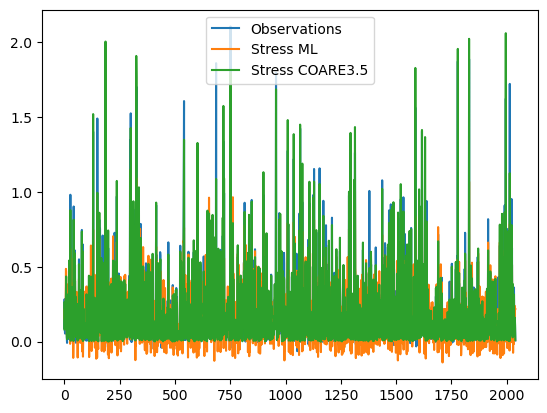

In [47]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

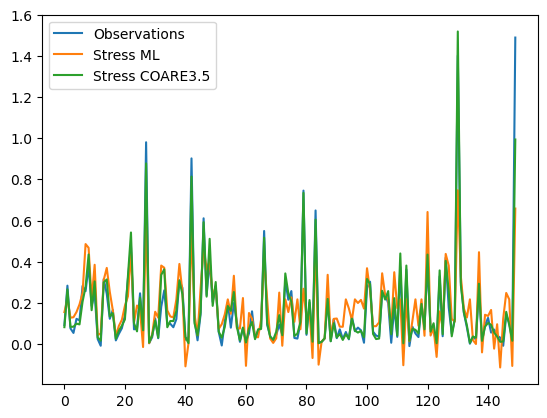

In [48]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [49]:
rmse(y_test.values, y_test_pred)

0.30050985939289815

## Correlation

In [50]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.77107785],
       [0.77107785, 1.        ]])

In [51]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [52]:
y_test.values.shape

(2040,)

In [53]:
y_test_pred[:, 0].shape

(2040,)

In [54]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [55]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.09144661, 0.28334564, 0.07565986, ..., 0.15754948, 0.06109848,
       0.00636154])

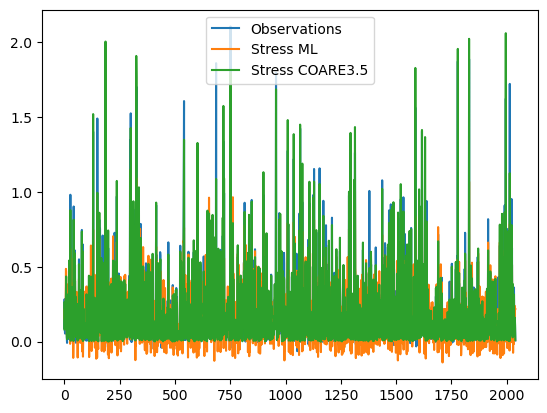

In [56]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

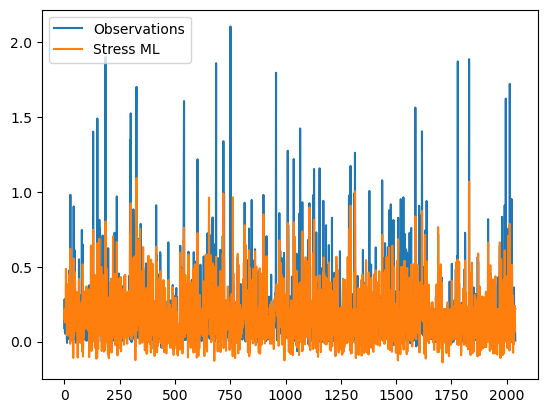

In [57]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [58]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [59]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.30050985939289815

Text(0, 0.5, 'Stress ML [N/m²]')

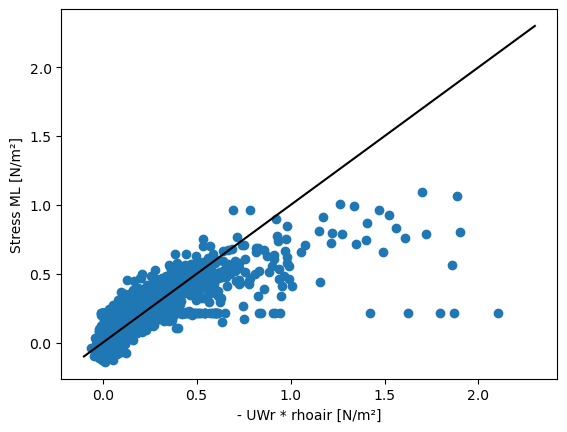

In [60]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [61]:
OUT_STEPS = 1
num_features = 1
batch_size =64
epochs=500

metric = 'mean_absolute_error'

In [62]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [63]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
90/90 [==============================] - 0s 2ms/step - loss: 2.5380 - mean_absolute_error: 1.1465 - val_loss: 1.0064 - val_mean_absolute_error: 0.6447
Epoch 2/500
90/90 [==============================] - 0s 955us/step - loss: 1.7458 - mean_absolute_error: 0.9343 - val_loss: 1.0050 - val_mean_absolute_error: 0.6609
Epoch 3/500
90/90 [==============================] - 0s 1ms/step - loss: 1.5458 - mean_absolute_error: 0.8577 - val_loss: 0.9516 - val_mean_absolute_error: 0.6495
Epoch 4/500
90/90 [==============================] - 0s 1ms/step - loss: 1.3732 - mean_absolute_error: 0.8012 - val_loss: 0.8851 - val_mean_absolute_error: 0.6165
Epoch 5/500
90/90 [==============================] - 0s 978us/step - loss: 1.1998 - mean_absolute_error: 0.7383 - val_loss: 0.8187 - val_mean_absolute_error: 0.5751
Epoch 6/500
90/90 [==============================] - 0s 951us/step - loss: 1.1386 - mean_absolute_error: 0.7206 - val_loss: 0.7752 - val_mean_absolute_error: 0.5595
Epoch 7/500
90/9

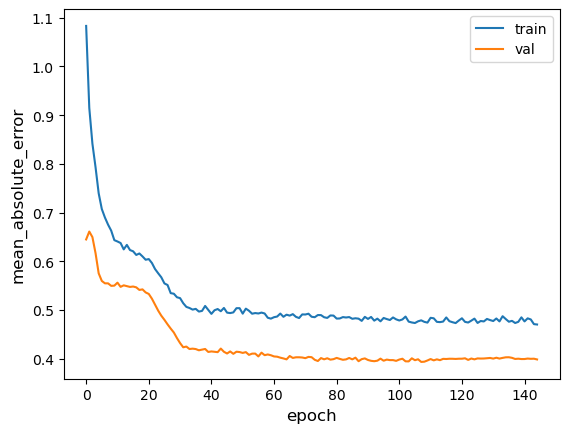

64/64 [==============================] - 0s 417us/step - loss: 0.5113 - mean_absolute_error: 0.4333
Test accuracy 0.43325209617614746
Test loss 0.5113232135772705


In [64]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [65]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [66]:
rmse(y_test.values, y_test_pred)

0.2828138897459842

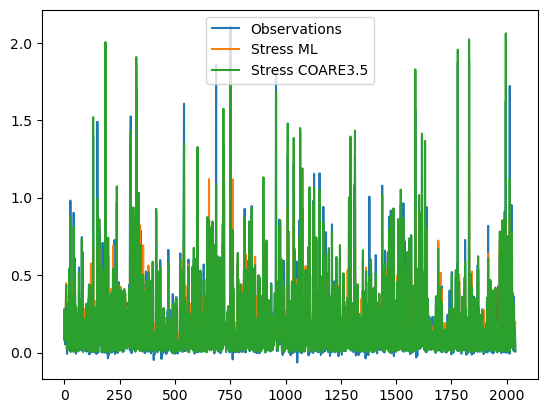

In [67]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

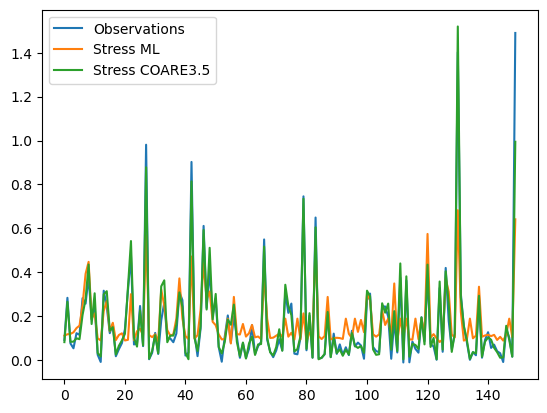

In [68]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

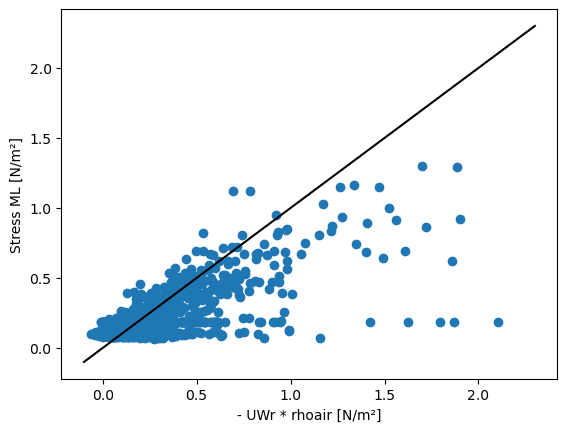

In [69]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [70]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.75427798],
       [0.75427798, 1.        ]])

In [71]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

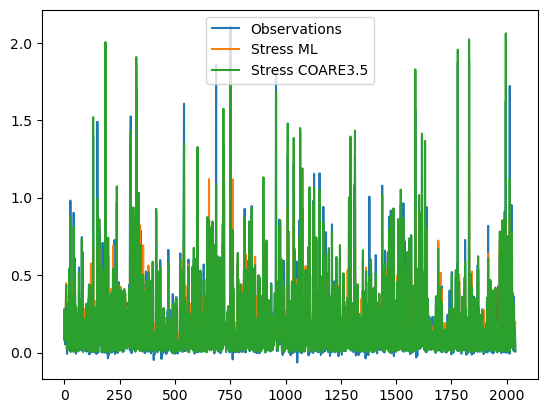

In [72]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

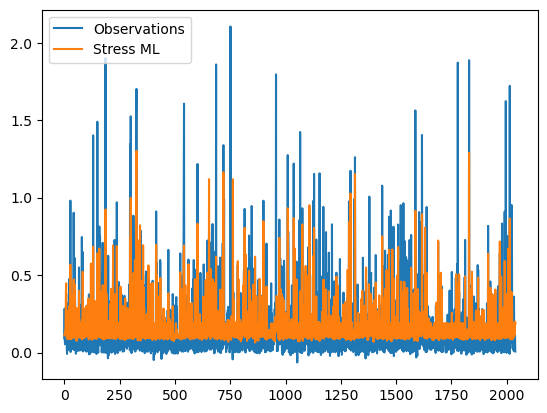

In [73]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [74]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [75]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2828138897459842

Text(0, 0.5, 'Stress ML [N/m²]')

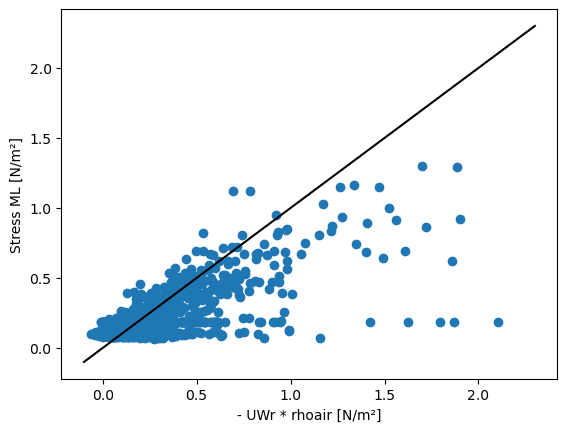

In [76]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [77]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [78]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [79]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 1ms/step - loss: 2.7544 - mean_absolute_error: 1.2460 - val_loss: 0.7327 - val_mean_absolute_error: 0.5544
Epoch 2/500
179/179 [==============================] - 0s 877us/step - loss: 1.2864 - mean_absolute_error: 0.7807 - val_loss: 0.5384 - val_mean_absolute_error: 0.4463
Epoch 3/500
179/179 [==============================] - 0s 859us/step - loss: 0.9251 - mean_absolute_error: 0.6439 - val_loss: 0.4775 - val_mean_absolute_error: 0.4152
Epoch 4/500
179/179 [==============================] - 0s 851us/step - loss: 0.8363 - mean_absolute_error: 0.5851 - val_loss: 0.4831 - val_mean_absolute_error: 0.4021
Epoch 5/500
179/179 [==============================] - 0s 847us/step - loss: 0.7980 - mean_absolute_error: 0.5479 - val_loss: 0.4418 - val_mean_absolute_error: 0.3858
Epoch 6/500
179/179 [==============================] - 0s 835us/step - loss: 0.7719 - mean_absolute_error: 0.5294 - val_loss: 0.4181 - val_mean_absolute_error: 0.3782


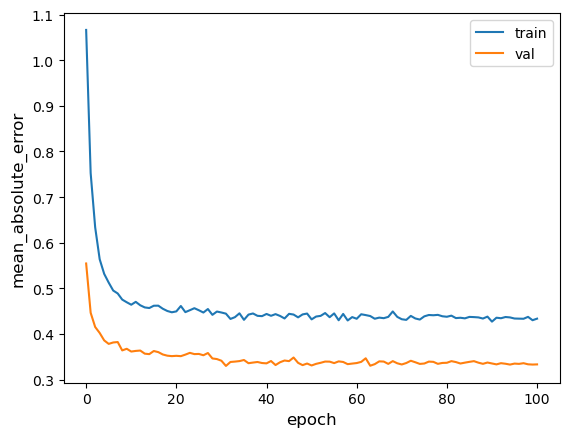

64/64 [==============================] - 0s 412us/step - loss: 0.3917 - mean_absolute_error: 0.3576
Test accuracy 0.3576083779335022
Test loss 0.3916778564453125


In [80]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [81]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [82]:
rmse(y_test.values, y_test_pred)

0.2984336011396992

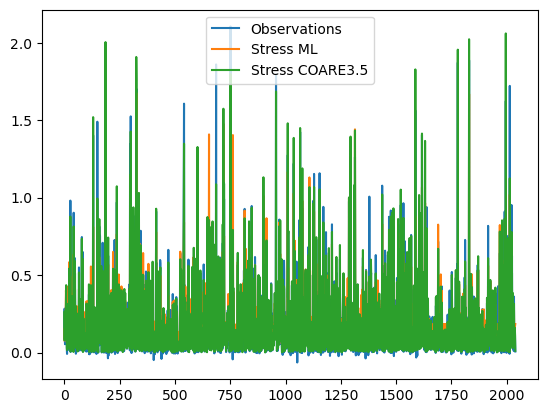

In [83]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

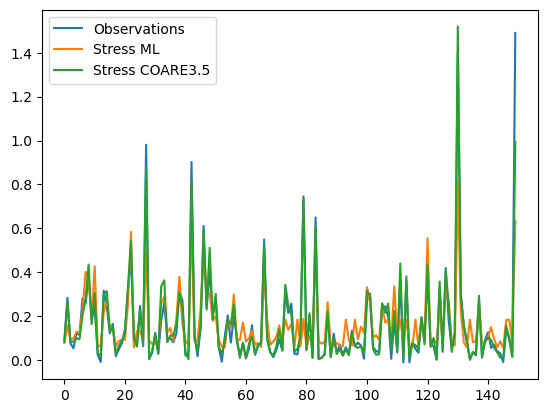

In [84]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

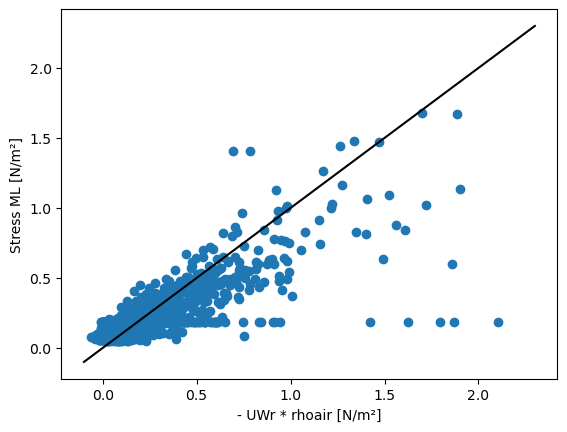

In [85]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [86]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.81175982],
       [0.81175982, 1.        ]])

In [87]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

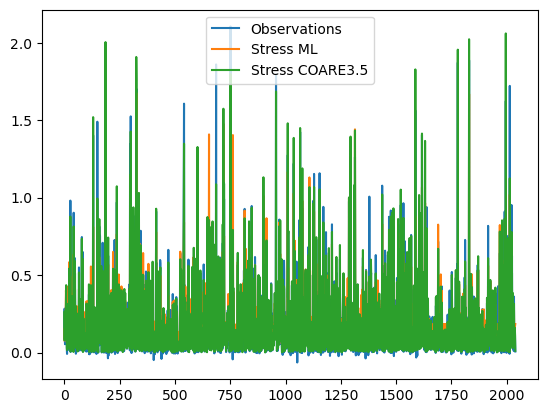

In [88]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -1], label='Stress COARE3.5')
plt.legend()

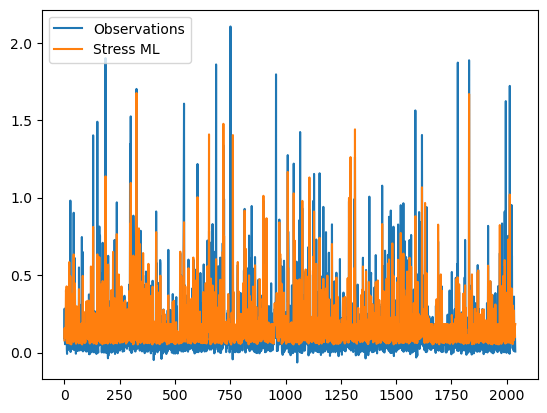

In [89]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [90]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [91]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.2984336011396992

Text(0, 0.5, 'Stress ML [N/m²]')

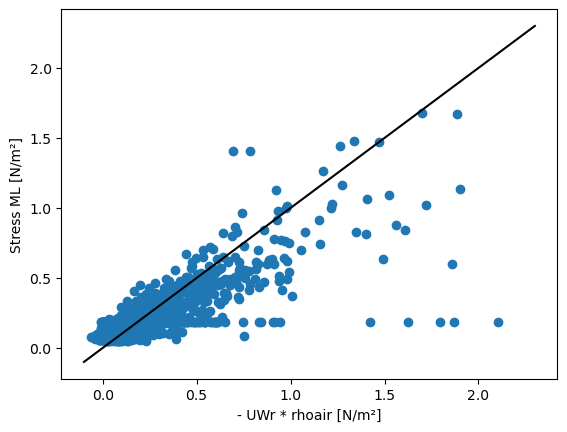

In [92]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [93]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [94]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [95]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 2ms/step - loss: 1.1489 - mean_absolute_error: 0.7236 - val_loss: 0.7549 - val_mean_absolute_error: 0.5691
Epoch 2/500
179/179 [==============================] - 0s 1ms/step - loss: 0.6772 - mean_absolute_error: 0.5478 - val_loss: 0.5980 - val_mean_absolute_error: 0.4365
Epoch 3/500
179/179 [==============================] - 0s 1ms/step - loss: 0.7118 - mean_absolute_error: 0.5209 - val_loss: 0.4499 - val_mean_absolute_error: 0.3403
Epoch 4/500
179/179 [==============================] - 0s 1ms/step - loss: 0.5908 - mean_absolute_error: 0.4456 - val_loss: 0.3634 - val_mean_absolute_error: 0.3063
Epoch 5/500
179/179 [==============================] - 0s 1ms/step - loss: 0.5215 - mean_absolute_error: 0.4214 - val_loss: 0.3227 - val_mean_absolute_error: 0.3026
Epoch 6/500
179/179 [==============================] - 0s 1ms/step - loss: 0.5349 - mean_absolute_error: 0.4090 - val_loss: 0.3208 - val_mean_absolute_error: 0.2917
Epoch 7/50

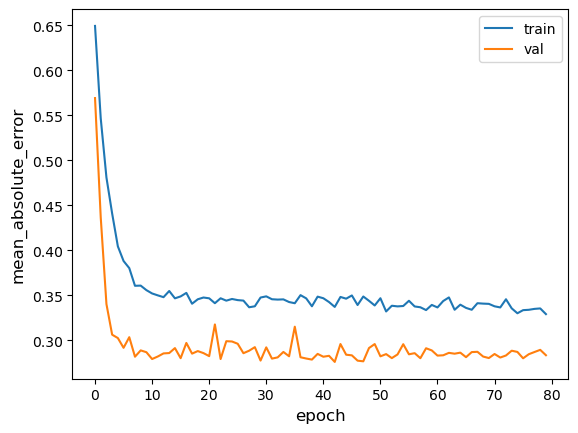

64/64 [==============================] - 0s 404us/step - loss: 0.3391 - mean_absolute_error: 0.3019
Test accuracy 0.30186641216278076
Test loss 0.33914902806282043


In [96]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [97]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [98]:
rmse(y_test.values, y_test_pred)

0.3211078682214494

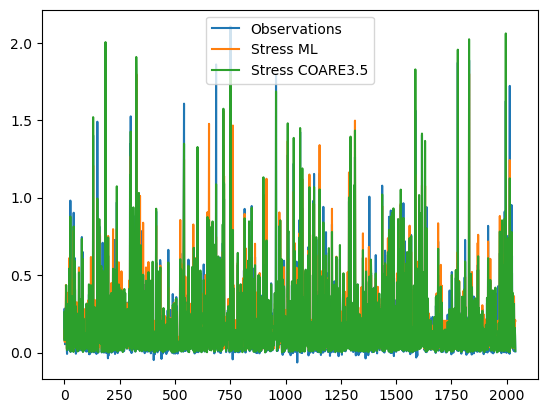

In [99]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

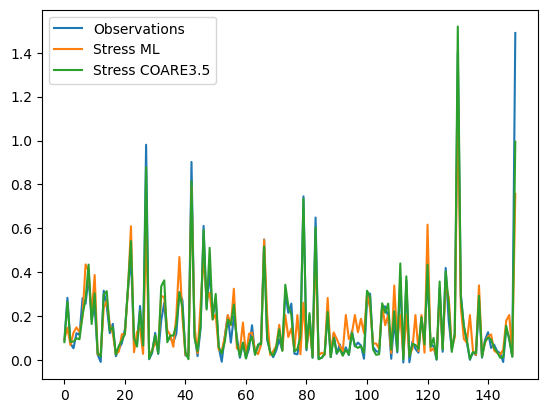

In [100]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

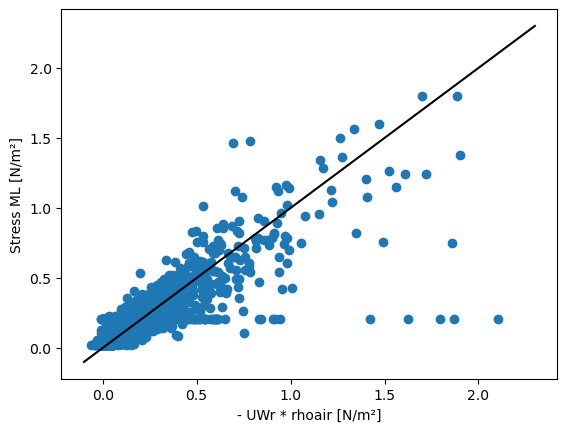

In [101]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [102]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.83228329],
       [0.83228329, 1.        ]])

In [103]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

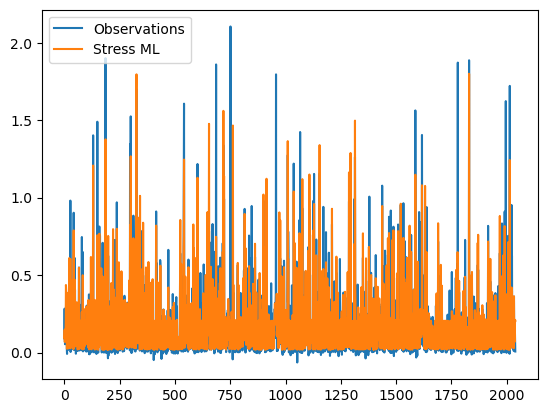

In [104]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [105]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [106]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.3211078682214494

Text(0, 0.5, 'Stress ML [N/m²]')

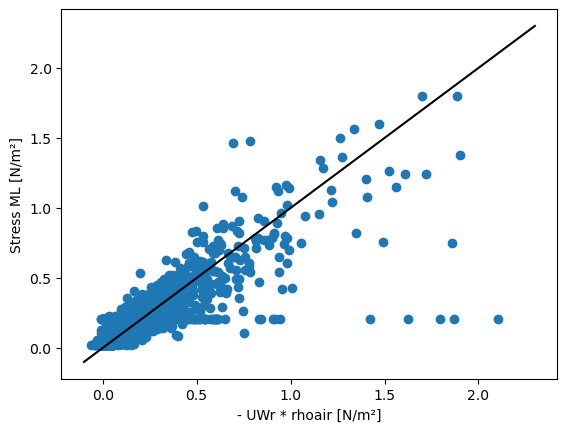

In [107]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [108]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.83228329],
       [0.83228329, 1.        ]])

In [109]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [110]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [111]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [112]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 1s 5ms/step - loss: 2.5475 - mean_absolute_error: 1.0345 - val_loss: 0.7619 - val_mean_absolute_error: 0.5995
Epoch 2/500
179/179 [==============================] - 1s 4ms/step - loss: 0.8291 - mean_absolute_error: 0.6462 - val_loss: 0.6213 - val_mean_absolute_error: 0.5015
Epoch 3/500
179/179 [==============================] - 1s 4ms/step - loss: 0.7618 - mean_absolute_error: 0.5859 - val_loss: 0.3968 - val_mean_absolute_error: 0.3436
Epoch 4/500
179/179 [==============================] - 1s 4ms/step - loss: 0.6769 - mean_absolute_error: 0.5240 - val_loss: 0.3683 - val_mean_absolute_error: 0.3634
Epoch 5/500
179/179 [==============================] - 1s 4ms/step - loss: 0.6052 - mean_absolute_error: 0.4888 - val_loss: 0.3827 - val_mean_absolute_error: 0.3605
Epoch 6/500
179/179 [==============================] - 1s 4ms/step - loss: 0.5808 - mean_absolute_error: 0.4545 - val_loss: 0.3244 - val_mean_absolute_error: 0.3055
Epoch 7/50

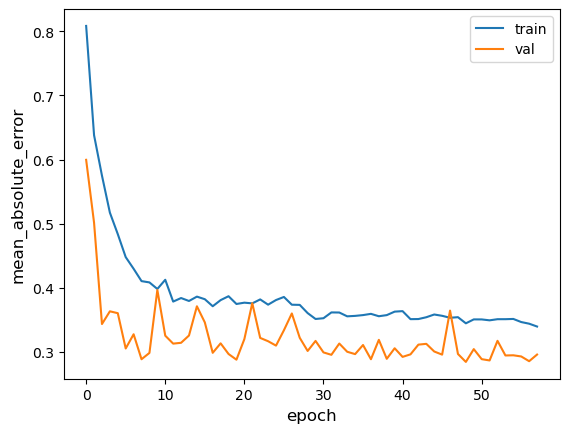

64/64 [==============================] - 0s 708us/step - loss: 0.3492 - mean_absolute_error: 0.3163
Test accuracy 0.3163336515426636
Test loss 0.3491813540458679


In [113]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [114]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [115]:
rmse(y_test.values, y_test_pred)

0.3135490474925332

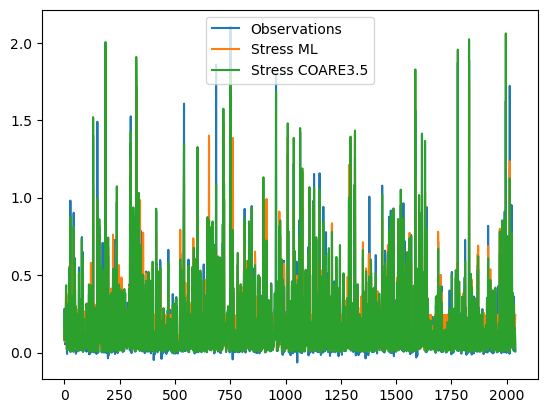

In [116]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

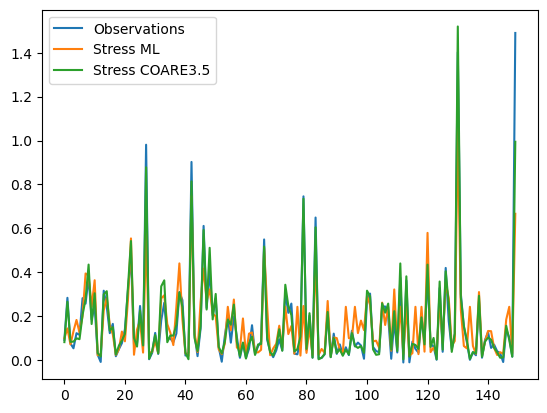

In [117]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [118]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.82727565],
       [0.82727565, 1.        ]])

In [119]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

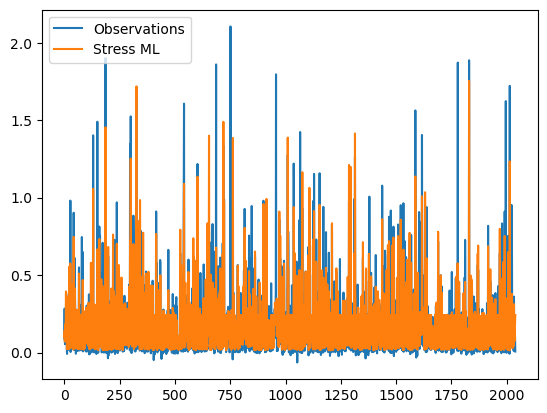

In [120]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [121]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [122]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3135490474925332

Text(0, 0.5, 'Stress ML [N/m²]')

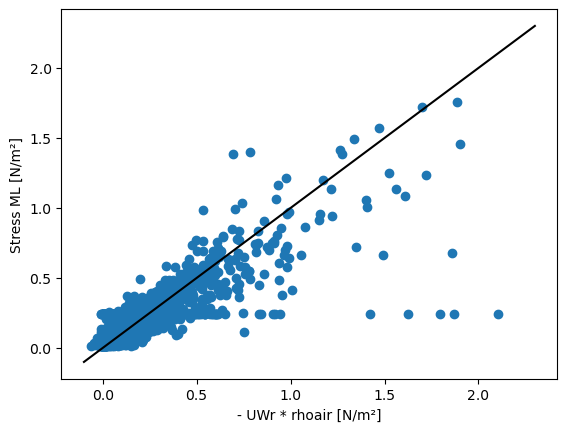

In [123]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [124]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [125]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [126]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
179/179 [==============================] - 3s 12ms/step - loss: 3.6587 - mean_absolute_error: 1.1478 - val_loss: 1.0156 - val_mean_absolute_error: 0.5412
Epoch 2/500
179/179 [==============================] - 2s 11ms/step - loss: 0.9894 - mean_absolute_error: 0.6874 - val_loss: 0.9812 - val_mean_absolute_error: 0.5356
Epoch 3/500
179/179 [==============================] - 2s 11ms/step - loss: 0.8073 - mean_absolute_error: 0.5976 - val_loss: 0.6411 - val_mean_absolute_error: 0.4355
Epoch 4/500
179/179 [==============================] - 2s 11ms/step - loss: 0.6183 - mean_absolute_error: 0.5212 - val_loss: 0.3579 - val_mean_absolute_error: 0.3257
Epoch 5/500
179/179 [==============================] - 2s 11ms/step - loss: 0.6448 - mean_absolute_error: 0.5040 - val_loss: 0.3573 - val_mean_absolute_error: 0.3257
Epoch 6/500
179/179 [==============================] - 2s 11ms/step - loss: 0.5362 - mean_absolute_error: 0.4553 - val_loss: 0.3894 - val_mean_absolute_error: 0.4091
Epoc

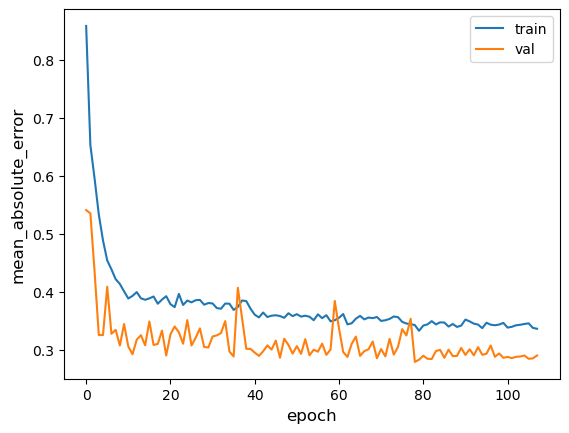

64/64 [==============================] - 0s 2ms/step - loss: 0.3457 - mean_absolute_error: 0.3077
Test accuracy 0.3077450394630432
Test loss 0.34571415185928345


In [127]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [128]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [129]:
rmse(y_test.values, y_test_pred)

0.3160788100971204

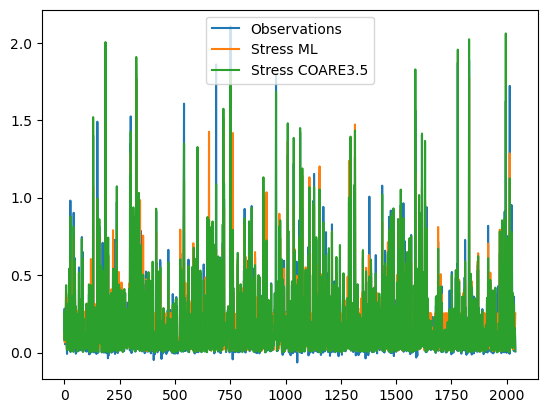

In [130]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

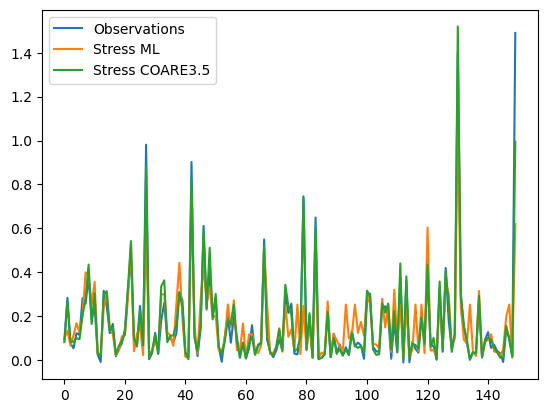

In [131]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [132]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.82875617],
       [0.82875617, 1.        ]])

In [133]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

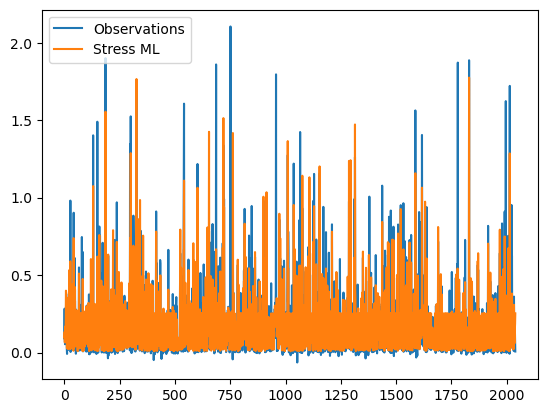

In [134]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [135]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [136]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3160788100971204

Text(0, 0.5, 'Stress ML [N/m²]')

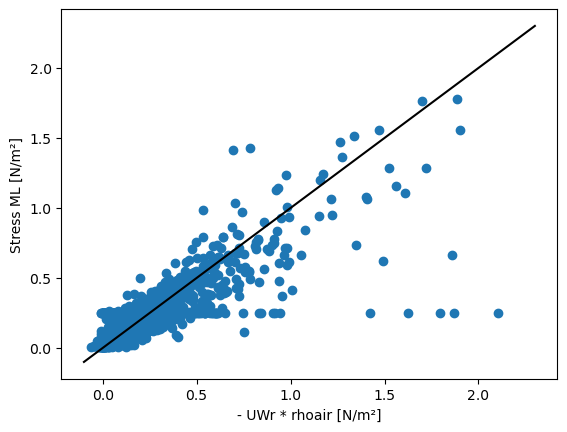

In [137]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

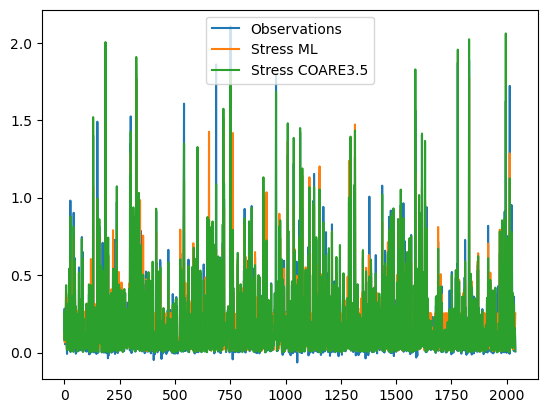

In [138]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

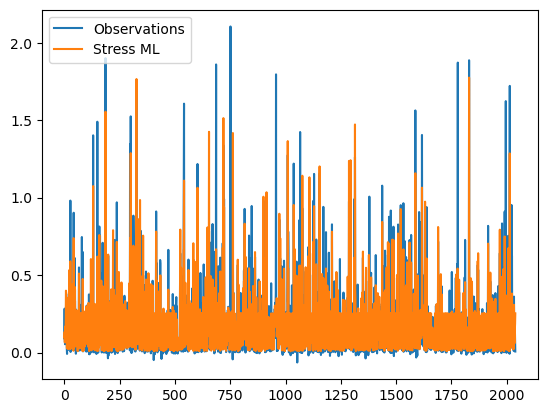

In [139]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [140]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.82875617],
       [0.82875617, 1.        ]])

In [141]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [142]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.3160788100971204

Text(0, 0.5, 'Stress ML [N/m²]')

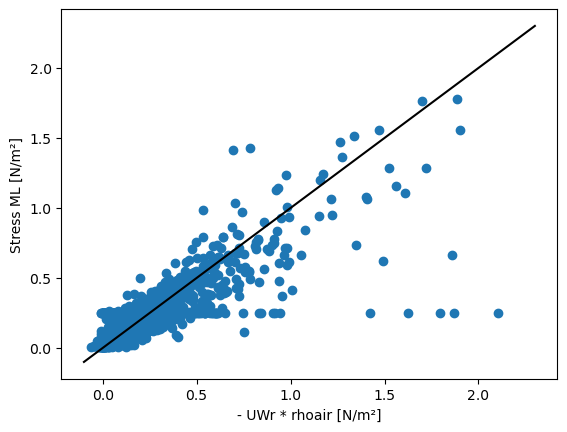

In [143]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [144]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [145]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [146]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 38ms/step - loss: 11.9885 - mean_absolute_error: 2.0984 - val_loss: 0.7755 - val_mean_absolute_error: 0.5840
Epoch 2/500
12/12 [==============================] - 0s 29ms/step - loss: 1.2381 - mean_absolute_error: 0.8012 - val_loss: 0.7944 - val_mean_absolute_error: 0.5643
Epoch 3/500
12/12 [==============================] - 0s 29ms/step - loss: 0.9448 - mean_absolute_error: 0.6923 - val_loss: 0.8191 - val_mean_absolute_error: 0.5842
Epoch 4/500
12/12 [==============================] - 0s 29ms/step - loss: 0.9116 - mean_absolute_error: 0.6612 - val_loss: 0.8865 - val_mean_absolute_error: 0.6778
Epoch 5/500
12/12 [==============================] - 0s 29ms/step - loss: 0.8449 - mean_absolute_error: 0.6275 - val_loss: 0.8576 - val_mean_absolute_error: 0.5974
Epoch 6/500
12/12 [==============================] - 0s 29ms/step - loss: 0.8492 - mean_absolute_error: 0.6174 - val_loss: 0.8743 - val_mean_absolute_error: 0.5595
Epoch 7/500
12/

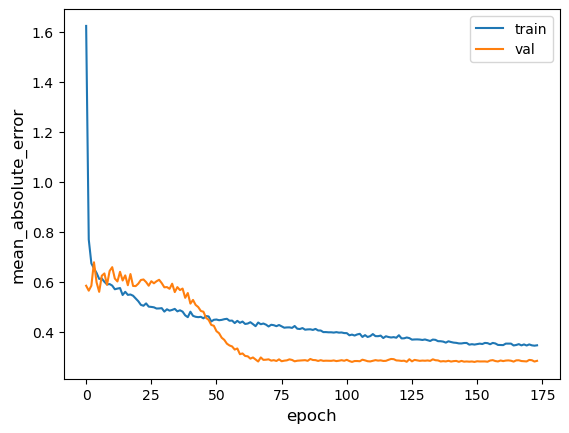

64/64 [==============================] - 0s 2ms/step - loss: 0.3388 - mean_absolute_error: 0.3029
Test accuracy 0.3029364049434662
Test loss 0.33882975578308105


In [147]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [148]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [149]:
rmse(y_test.values, y_test_pred)

0.3135915311820782

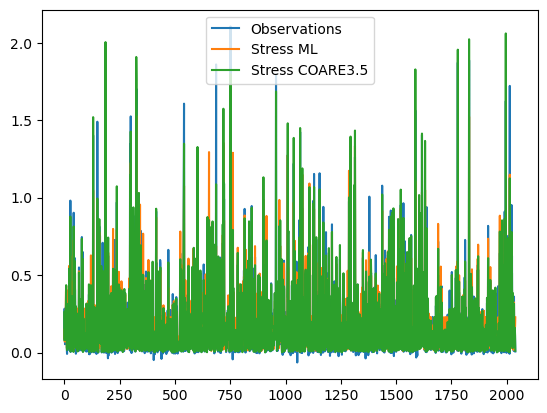

In [150]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

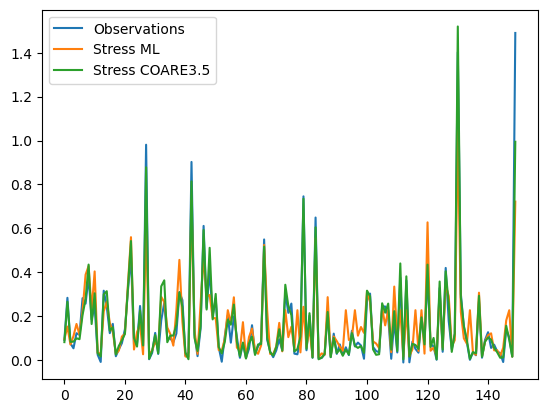

In [151]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [152]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.83316615],
       [0.83316615, 1.        ]])

In [153]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

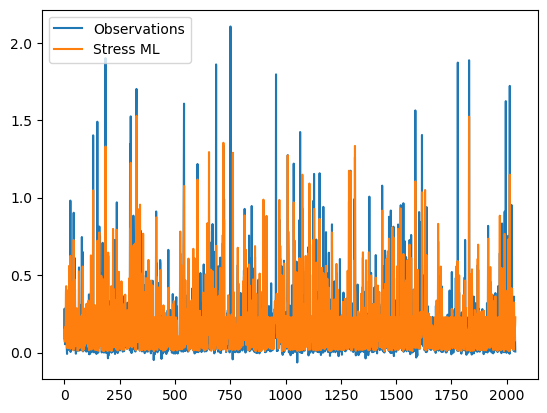

In [154]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [155]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [156]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3135915311820782

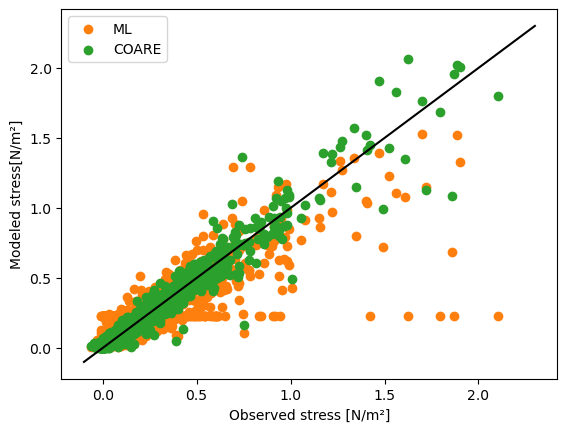

In [157]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

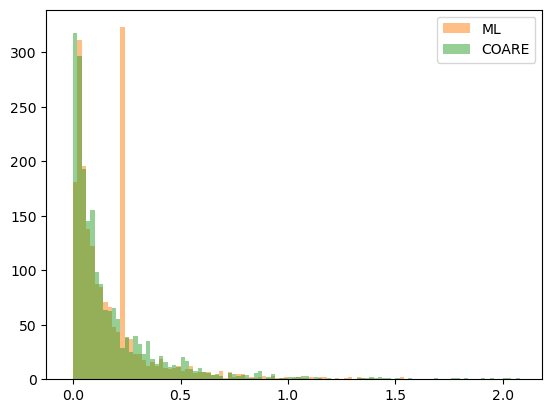

In [158]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [159]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [160]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [161]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
12/12 [==============================] - 1s 39ms/step - loss: 19.0041 - mean_absolute_error: 2.5701 - val_loss: 0.8483 - val_mean_absolute_error: 0.6361
Epoch 2/500
12/12 [==============================] - 0s 29ms/step - loss: 1.2628 - mean_absolute_error: 0.7757 - val_loss: 0.8577 - val_mean_absolute_error: 0.6403
Epoch 3/500
12/12 [==============================] - 0s 29ms/step - loss: 0.9614 - mean_absolute_error: 0.7014 - val_loss: 0.9451 - val_mean_absolute_error: 0.6700
Epoch 4/500
12/12 [==============================] - 0s 29ms/step - loss: 0.8856 - mean_absolute_error: 0.6499 - val_loss: 1.0059 - val_mean_absolute_error: 0.7397
Epoch 5/500
12/12 [==============================] - 0s 29ms/step - loss: 0.8584 - mean_absolute_error: 0.6304 - val_loss: 0.9402 - val_mean_absolute_error: 0.6556
Epoch 6/500
12/12 [==============================] - 0s 29ms/step - loss: 0.8225 - mean_absolute_error: 0.6178 - val_loss: 0.9727 - val_mean_absolute_error: 0.6766
Epoch 7/500
12/

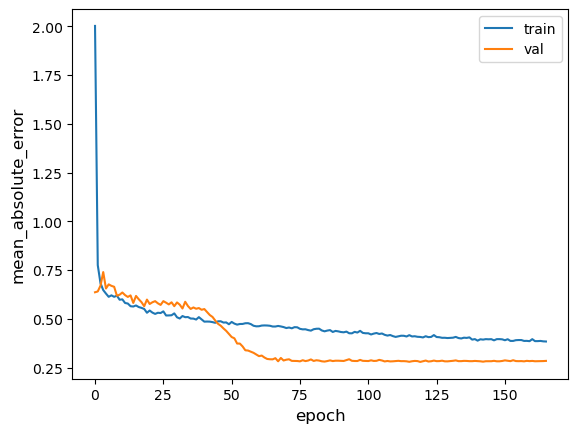

64/64 [==============================] - 0s 2ms/step - loss: 0.3396 - mean_absolute_error: 0.3047
Test accuracy 0.3047245740890503
Test loss 0.3395652174949646


In [162]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [163]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [164]:
rmse(y_test.values, y_test_pred)

0.3122750284961016

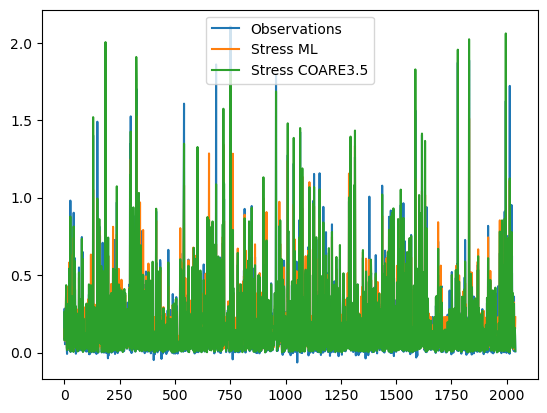

In [165]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

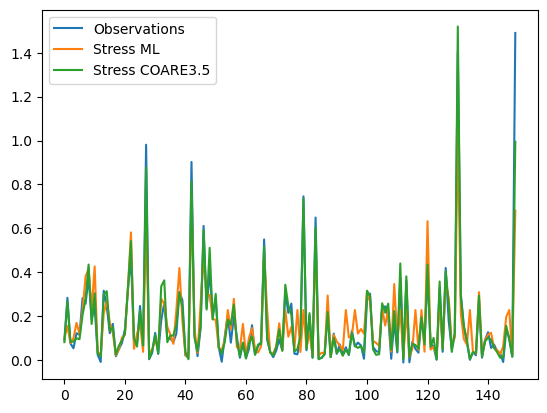

In [166]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [167]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.83317778],
       [0.83317778, 1.        ]])

In [168]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

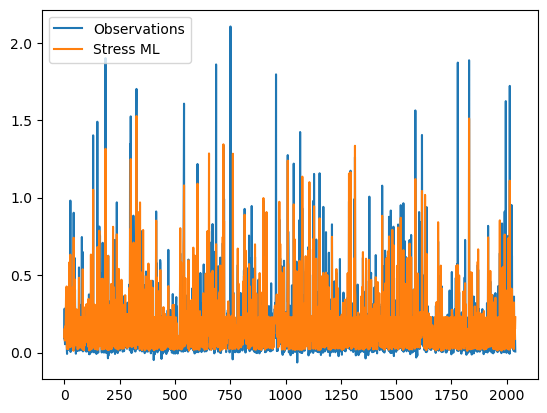

In [169]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [170]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [171]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3122750284961016

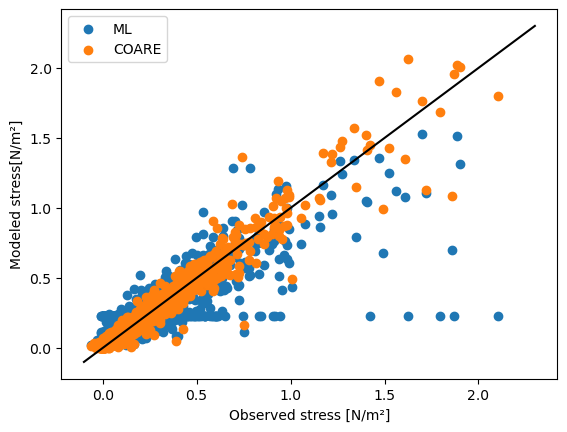

In [172]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

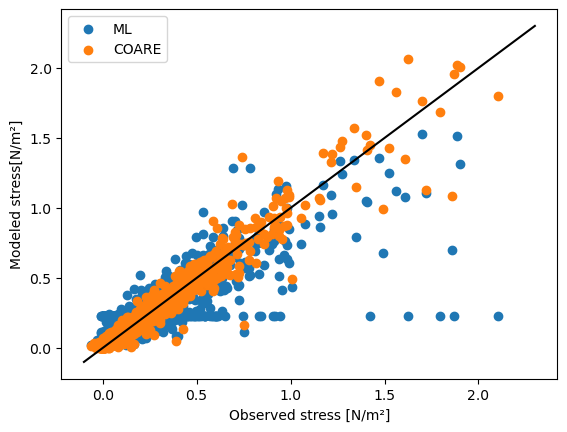

In [173]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [174]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [175]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [176]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
6/6 [==============================] - 2s 131ms/step - loss: 24.5069 - mean_absolute_error: 3.0780 - val_loss: 0.7645 - val_mean_absolute_error: 0.5999
Epoch 2/500
6/6 [==============================] - 1s 109ms/step - loss: 1.6901 - mean_absolute_error: 0.9632 - val_loss: 0.8462 - val_mean_absolute_error: 0.7043
Epoch 3/500
6/6 [==============================] - 1s 105ms/step - loss: 1.4014 - mean_absolute_error: 0.8569 - val_loss: 0.9979 - val_mean_absolute_error: 0.8049
Epoch 4/500
6/6 [==============================] - 1s 105ms/step - loss: 1.1525 - mean_absolute_error: 0.7663 - val_loss: 1.2491 - val_mean_absolute_error: 0.9546
Epoch 5/500
6/6 [==============================] - 1s 109ms/step - loss: 1.1080 - mean_absolute_error: 0.7393 - val_loss: 1.1397 - val_mean_absolute_error: 0.9040
Epoch 6/500
6/6 [==============================] - 1s 107ms/step - loss: 1.0426 - mean_absolute_error: 0.7107 - val_loss: 1.1993 - val_mean_absolute_error: 0.9280
Epoch 7/500
6/6 [====

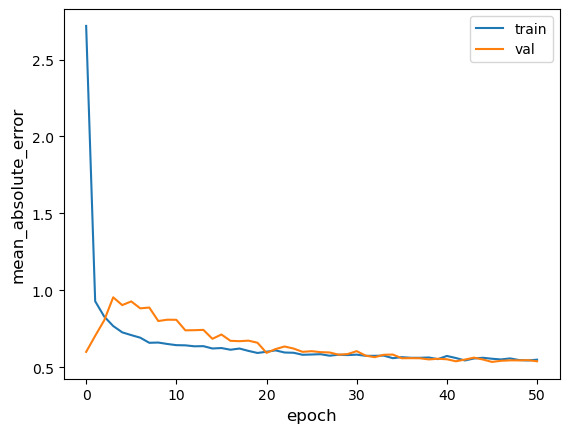

64/64 [==============================] - 0s 7ms/step - loss: 1.0616 - mean_absolute_error: 0.5891
Test accuracy 0.5891147255897522
Test loss 1.0616381168365479


In [177]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [178]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [179]:
rmse(y_test.values, y_test_pred)

0.2500857004223755

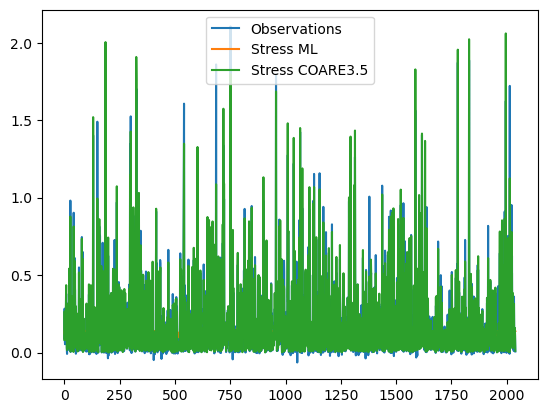

In [180]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

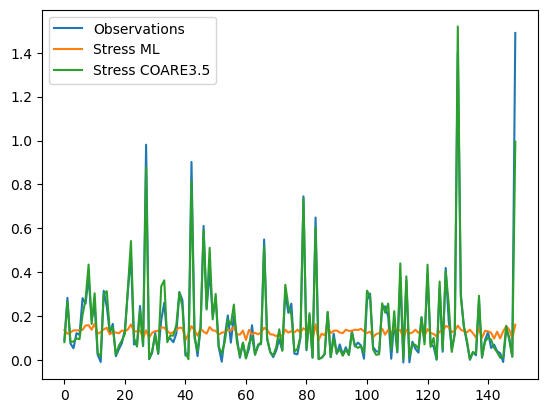

In [181]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [182]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.57271444],
       [0.57271444, 1.        ]])

In [183]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

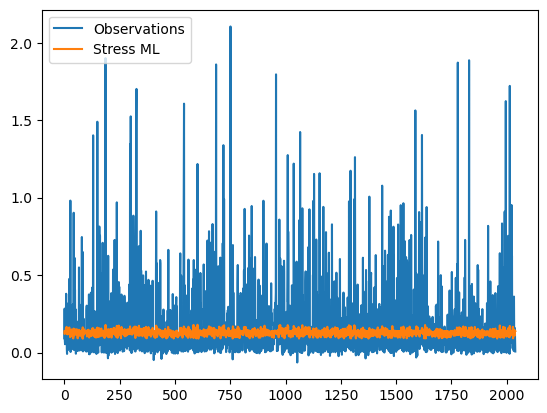

In [184]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [185]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [186]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.2500857004223755

Text(0, 0.5, 'Stress ML [N/m²]')

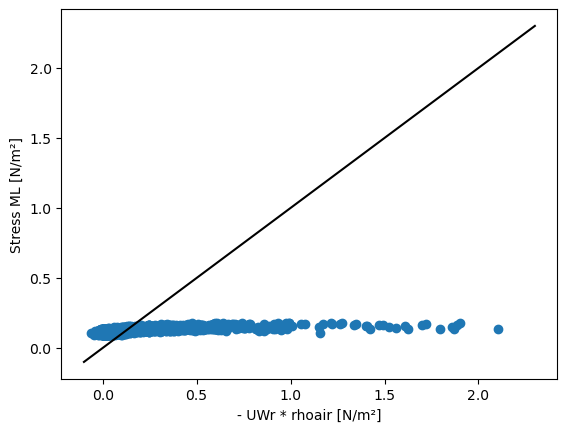

In [187]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [188]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [189]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [190]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 608ms/step - loss: 28.4603 - mean_absolute_error: 3.2962 - val_loss: 0.8211 - val_mean_absolute_error: 0.6753
Epoch 2/1000
3/3 [==============================] - 2s 548ms/step - loss: 2.2431 - mean_absolute_error: 1.1547 - val_loss: 0.8324 - val_mean_absolute_error: 0.7795
Epoch 3/1000
3/3 [==============================] - 2s 538ms/step - loss: 1.6852 - mean_absolute_error: 0.9472 - val_loss: 0.5591 - val_mean_absolute_error: 0.5391
Epoch 4/1000
3/3 [==============================] - 2s 530ms/step - loss: 1.3365 - mean_absolute_error: 0.8625 - val_loss: 1.1144 - val_mean_absolute_error: 0.8421
Epoch 5/1000
3/3 [==============================] - 2s 551ms/step - loss: 1.2943 - mean_absolute_error: 0.8399 - val_loss: 4.0438 - val_mean_absolute_error: 1.9104
Epoch 6/1000
3/3 [==============================] - 2s 545ms/step - loss: 1.3465 - mean_absolute_error: 0.8561 - val_loss: 9.8273 - val_mean_absolute_error: 3.0685
Epoch 7/1000
3/

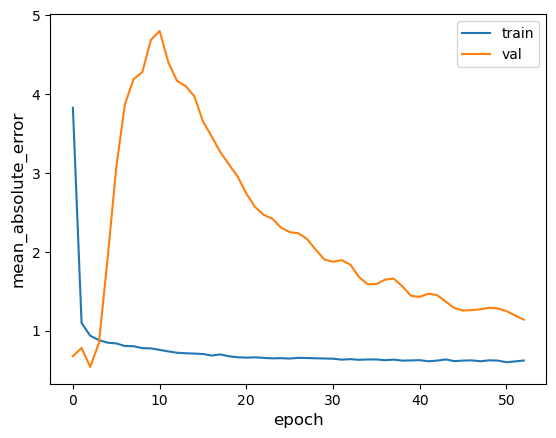

64/64 [==============================] - 2s 24ms/step - loss: 2.4586 - mean_absolute_error: 1.1890
Test accuracy 1.1889965534210205
Test loss 2.4586195945739746


In [191]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [192]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [193]:
rmse(y_test.values, y_test_pred)

0.3706881996851911

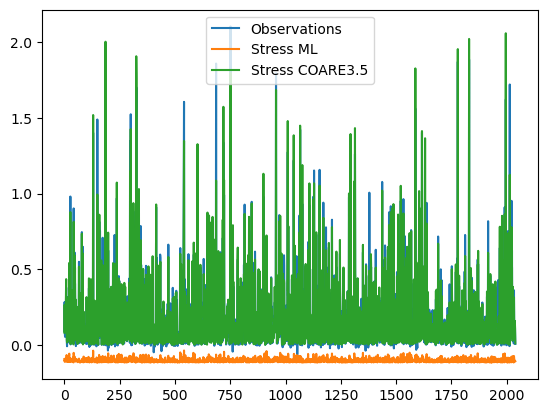

In [194]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

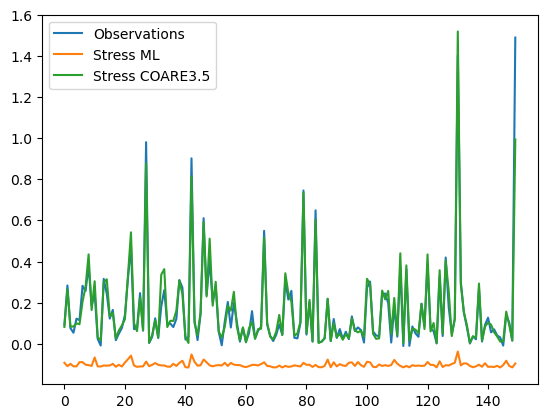

In [195]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [196]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.53205073],
       [0.53205073, 1.        ]])

In [197]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

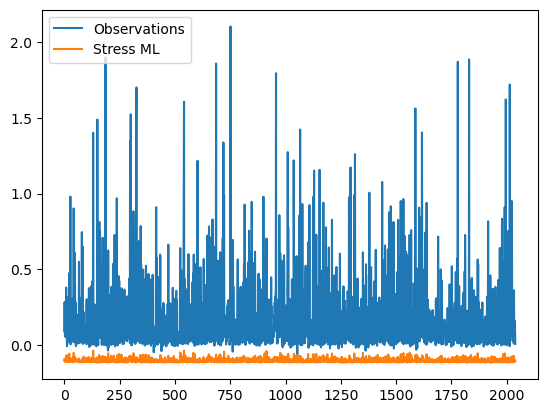

In [198]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [199]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [200]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3706881996851911

Text(0, 0.5, 'Stress ML [N/m²]')

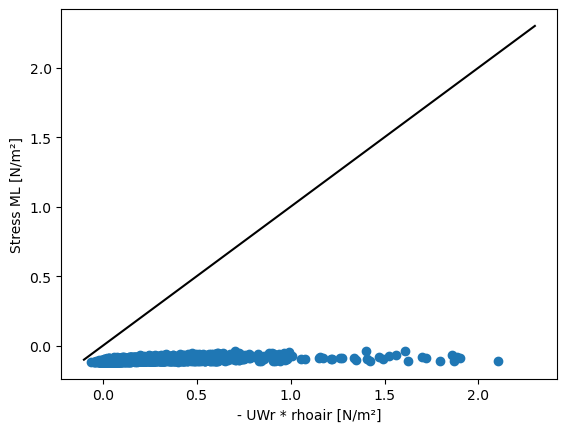

In [201]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [202]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [203]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [204]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 592ms/step - loss: 17.7056 - mean_absolute_error: 2.9742 - val_loss: 0.7689 - val_mean_absolute_error: 0.6614
Epoch 2/1000
3/3 [==============================] - 2s 517ms/step - loss: 2.7076 - mean_absolute_error: 1.2444 - val_loss: 0.8770 - val_mean_absolute_error: 0.7928
Epoch 3/1000
3/3 [==============================] - 2s 519ms/step - loss: 1.5850 - mean_absolute_error: 0.9549 - val_loss: 1.7709 - val_mean_absolute_error: 1.0932
Epoch 4/1000
3/3 [==============================] - 2s 525ms/step - loss: 1.3305 - mean_absolute_error: 0.8261 - val_loss: 0.8669 - val_mean_absolute_error: 0.7739
Epoch 5/1000
3/3 [==============================] - 1s 502ms/step - loss: 1.4685 - mean_absolute_error: 0.8489 - val_loss: 0.8791 - val_mean_absolute_error: 0.8035
Epoch 6/1000
3/3 [==============================] - 1s 512ms/step - loss: 1.1229 - mean_absolute_error: 0.7649 - val_loss: 0.8385 - val_mean_absolute_error: 0.7493
Epoch 7/1000
3/

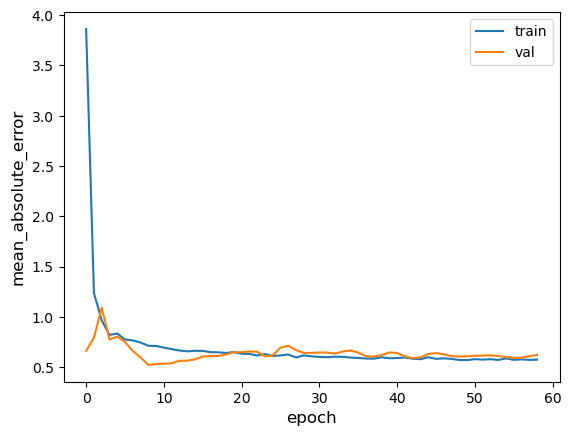

64/64 [==============================] - 2s 24ms/step - loss: 1.5244 - mean_absolute_error: 0.6781
Test accuracy 0.6781078577041626
Test loss 1.5244371891021729


In [205]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [206]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [207]:
rmse(y_test.values, y_test_pred)

0.288056704586569

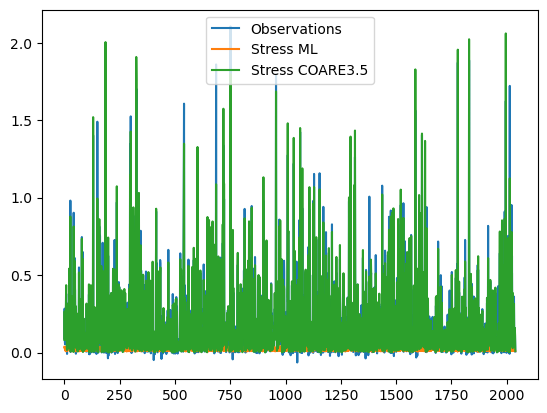

In [208]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

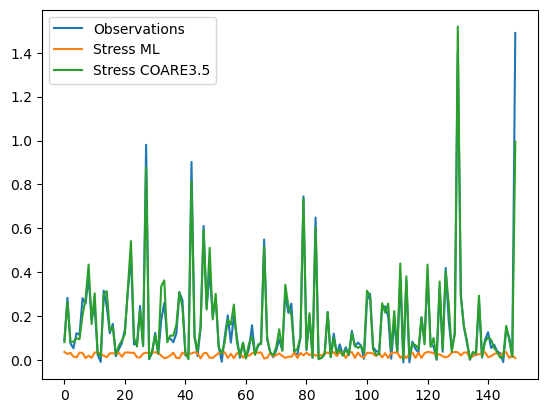

In [209]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [210]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.03306857],
       [-0.03306857,  1.        ]])

In [211]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

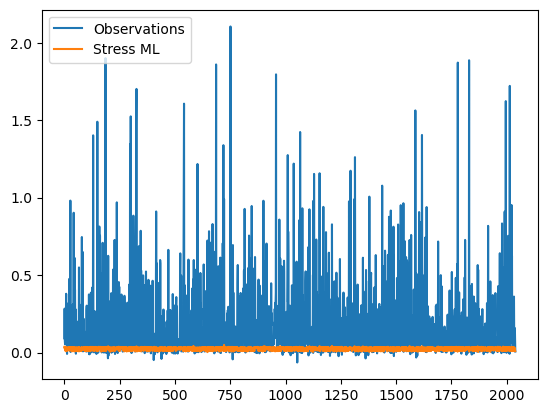

In [212]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [213]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [214]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.288056704586569

Text(0, 0.5, 'Stress ML [N/m²]')

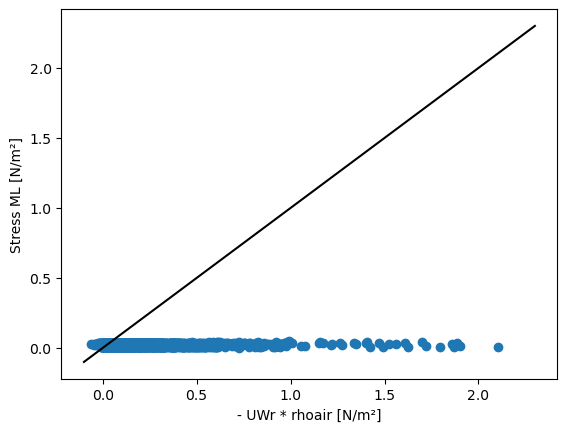

In [215]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [216]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_squared_error'

In [217]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [218]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
3/3 [==============================] - 3s 659ms/step - loss: 26.0394 - mean_absolute_error: 3.0836 - val_loss: 0.7504 - val_mean_absolute_error: 0.6430
Epoch 2/1000
3/3 [==============================] - 2s 578ms/step - loss: 4.2582 - mean_absolute_error: 1.6236 - val_loss: 0.8119 - val_mean_absolute_error: 0.7600
Epoch 3/1000
3/3 [==============================] - 2s 568ms/step - loss: 1.7167 - mean_absolute_error: 1.0060 - val_loss: 0.5770 - val_mean_absolute_error: 0.5794
Epoch 4/1000
3/3 [==============================] - 2s 569ms/step - loss: 1.4611 - mean_absolute_error: 0.8936 - val_loss: 1.1533 - val_mean_absolute_error: 0.8175
Epoch 5/1000
3/3 [==============================] - 2s 570ms/step - loss: 1.5044 - mean_absolute_error: 0.8815 - val_loss: 3.9057 - val_mean_absolute_error: 1.8238
Epoch 6/1000
3/3 [==============================] - 2s 572ms/step - loss: 1.1785 - mean_absolute_error: 0.7879 - val_loss: 8.3714 - val_mean_absolute_error: 2.8075
Epoch 7/1000
3/

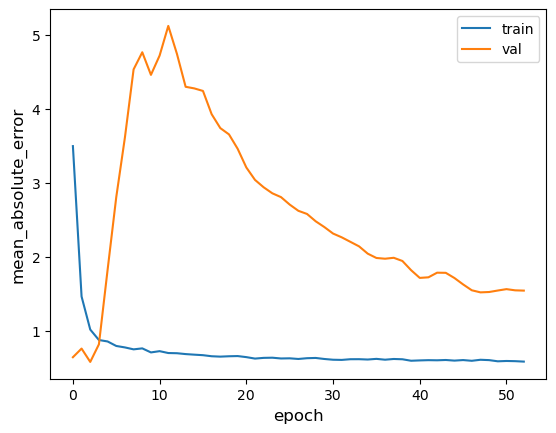

64/64 [==============================] - 2s 24ms/step - loss: 0.5801 - mean_absolute_error: 0.5927
Test accuracy 0.5927063822746277
Test loss 0.5800843238830566


In [219]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [220]:
y_test_pred = multi_dense_model.predict(x_test)

In [221]:
rmse(y_test.values, y_test_pred)

0.9359877091540993

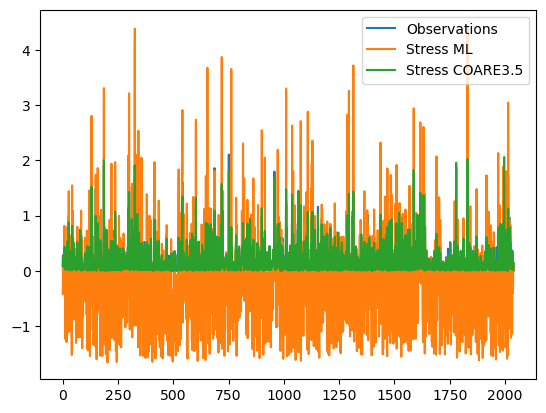

In [222]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

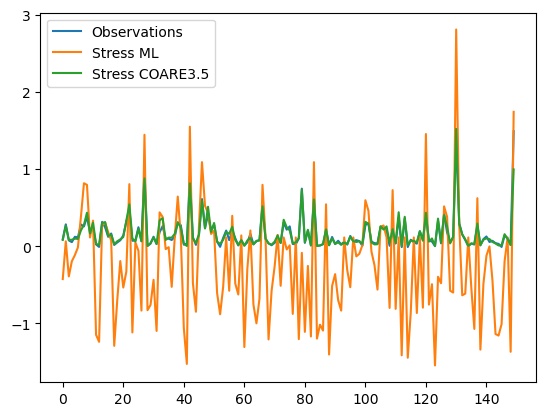

In [223]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [224]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.75186123],
       [0.75186123, 1.        ]])

In [225]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

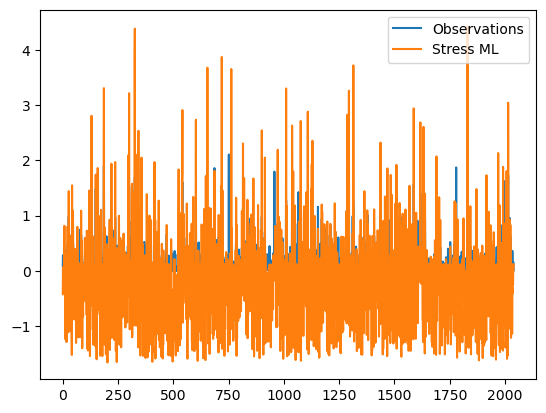

In [226]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [227]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97385838],
       [0.97385838, 1.        ]])

In [228]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.9359877091540993

Text(0, 0.5, 'Stress ML [N/m²]')

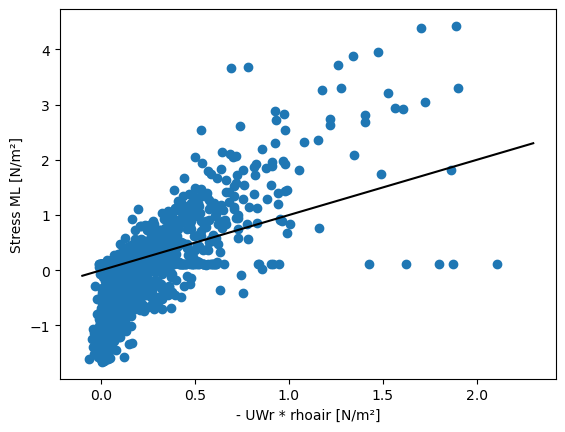

In [229]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 